In [1]:
import pandas as pd
import seaborn as sns


In [2]:
url="https://cssbook.net/d/private_capital.csv"
private = pd.read_csv(url)
private = private.melt(id_vars="Year", 
                       var_name="country", 
                       value_name="capital")
private.head()

,Year,country,capital
0,1970,U.S.,3.42
1,1971,U.S.,3.41
2,1972,U.S.,3.49
3,1973,U.S.,3.39
4,1974,U.S.,3.21


Text(0.5, 1.0, 'Capital in Europe, 1970 - 2010\nPartial reproduction of Piketty fig 4.4')

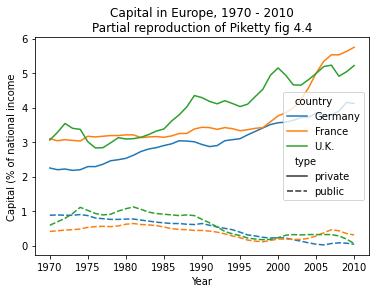

In [3]:
url = "https://cssbook.net/d/public_capital.csv"
public = pd.read_csv(url)
public = public.melt(id_vars="Year", 
    var_name="country", value_name="capital")
d = pd.concat([private.assign(type="private"), 
               public.assign(type="public")])

countries = {"France", "U.K.", "Germany"}
d = d.loc[d.country.isin(countries)]
plt = sns.lineplot(data=d, x="Year", y="capital", 
                   hue="country", style="type")
plt.set(ylabel="Capital (% of national income")
plt.set_title("Capital in Europe, 1970 - 2010" 
    "\nPartial reproduction of Piketty fig 4.4")


In [4]:
url="https://cssbook.net/d/Chapitre8.xls"
#1 Input: Read the data into a data frame
d = pd.read_excel(url, sheet_name="TS8.2", 
                  skiprows=4, skipfooter=3)

d = d.rename(columns={"Unnamed: 0": "year"})

#2 Reshape: Pivoting to long, dropping missing
d = d.melt(value_name="share", id_vars="year")

#3 Normalize
cols = ["_top", "percentile", "type", 
            "_share", "capital_gains"]
d[cols] = d.variable.str.split(n=4, expand=True)
d = d.drop(columns=["variable", "_top", "_share"])
d["capital_gains"] = d["capital_gains"].notna()

d.head()

,year,share,percentile,type,capital_gains
0,1900,0.405,10%,income,False
1,1901,NaN,10%,income,False
2,1902,NaN,10%,income,False
3,1903,NaN,10%,income,False
4,1904,NaN,10%,income,False


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Share of income going to top-1%')]

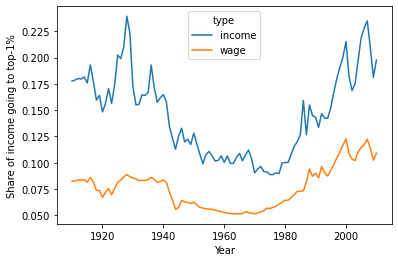

In [5]:
#4 Filter for the desired data
subset = d[(d.year >= 1910) & 
           (d.percentile == "1%") & 
           (d.capital_gains == False)]

#5 Analyze and/or visualize
plt = sns.lineplot(data=subset, hue="type",
                  x="year", y="share")
plt.set(xlabel="Year", 
        ylabel="Share of income going to top-1%")